In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Sales_train = pd.read_csv('Documents/Train1.csv')
Sales_train["Type"] = "train"
print(Sales_train.shape)

(8523, 13)


In [3]:
Sales_test = pd.read_csv('Documents/Test1.csv')
Sales_test["Type"] = "test"
print(Sales_test.shape)

Data_Predicted = Sales_test.loc[:,["Item_Identifier","Outlet_Identifier","Item_MRP"]]  ## will use later while prediction
#Data_Predicted.head()

(5681, 12)


In [4]:
dframes = [Sales_train,Sales_test]
Sales = pd.concat(dframes,ignore_index = True)
print(Sales.shape)
Sales.tail()

(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [5]:
Sales.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDR12,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


In [6]:
#imputing the visibility

In [7]:
Sales["Item_Visibility"].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [8]:
UniqueItems = set(Sales.Item_Identifier)
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Visibility"]==0),"Item_Visibility"] = Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Visibility"]!=0),"Item_Visibility"].mean()
Sales["Item_Visibility"].describe()

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

In [9]:
### Adding new feature Quantity Sold

In [10]:
Sales["Qty_Sold"] = (Sales["Item_Outlet_Sales"]/Sales["Item_MRP"])
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type,Qty_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,14.809346
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,4.021967
4,NCD19,8.93,Low Fat,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,18.467868


In [11]:
Sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Type                            0
Qty_Sold                     5681
dtype: int64

In [12]:
### To impute "Item_Weight", we are filtering the data for each unique "Item_Identifier" and then assigning the mean value of that category to the one which is "NA"

In [13]:
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Weight"].isnull()),"Item_Weight"] = Sales.loc[Sales["Item_Identifier"]==str(each),"Item_Weight"].mode()[0]

In [14]:
### cheking the imputation

In [15]:
Sales.Item_Weight.isnull().sum()

0

In [16]:
### Changing the Year Establishment year to Age

In [17]:
import datetime
now = datetime.datetime.now()
now.year

Sales["Outlet_Age"] = now.year - Sales["Outlet_Establishment_Year"]
Sales["Outlet_Age"].head()

0    22
1    12
2    22
3    23
4    34
Name: Outlet_Age, dtype: int64

In [18]:
# checking the relationship with the relationship comparison with heat map

<AxesSubplot:>

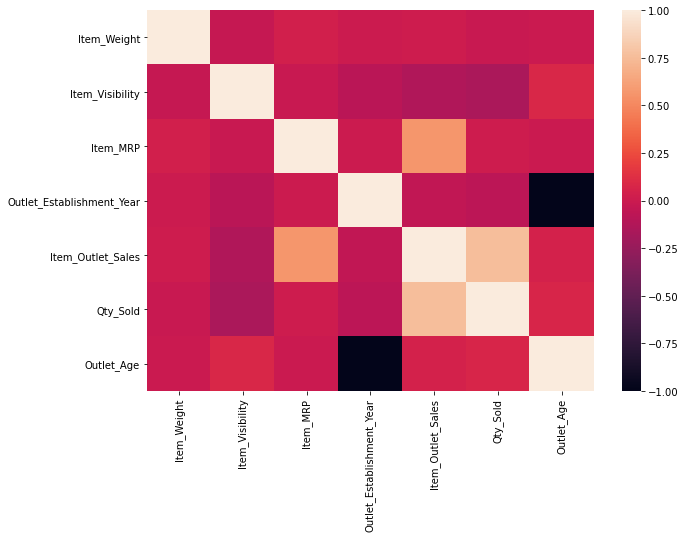

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(Sales.corr())

In [20]:
Sales.describe(include=["object"]).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Type'],
      dtype='object')

In [21]:
Sales.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [22]:
Sales.loc[Sales["Outlet_Size"].isnull(),"Outlet_Identifier"].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

In [23]:
# Looking for pattern for the missing Outlet_size

In [24]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT045") ,].describe(include = [object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type
count,1548,1548,1548,1548,0,1548,1548,1548
unique,1548,5,16,1,0,1,1,2
top,FDS01,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1,train
freq,1,932,218,1548,NaN,1548,1548,929


In [25]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT017") ,].describe(include = [object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type
count,1543,1543,1543,1543,0,1543,1543,1543
unique,1543,5,16,1,0,1,1,2
top,FDS01,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1,train
freq,1,928,219,1543,NaN,1543,1543,926


In [26]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT010") ,].describe(include = [object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Type
count,925,925,925,925,0,925,925,925
unique,925,5,16,1,0,1,1,2
top,FDS01,Low Fat,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
freq,1,543,137,925,NaN,925,925,555


In [27]:
### As for OUT045 and OUT017; Outlet_Location_Type	and Outlet_Type are same i.e. Tier 2 and Supermarket Type1, hence we can impute the data as per this

In [28]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 2") & (Sales["Outlet_Type"]=="Supermarket Type1") ,"Outlet_Size"].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [29]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"] = "Small"
Sales.loc[ (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"].value_counts()

Small    3091
Name: Outlet_Size, dtype: int64

In [30]:
#for "OUT010"

In [31]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") & (Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [32]:
Sales.loc[(Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Small    880
Name: Outlet_Size, dtype: int64

In [33]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") ,"Outlet_Size"].value_counts()

Medium    3105
High      1553
Name: Outlet_Size, dtype: int64

In [34]:
Sales.loc[Sales["Outlet_Size"].isnull(),].shape

(925, 15)

In [35]:
Sales['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [36]:
### To impute "Outlet_Size for OUT010", we will build a classifier

In [37]:
### Changing the categorical data to numerical

In [38]:
## imputing ordinal data

In [39]:
mapping_Item_Type = {'Fruits and Vegetables': "Fruit_Veg",
                    'Household':"HH_HH", 'Health and Hygiene':"HH_HH",
                    'Baking Goods': "Bake_Snacks", 'Snack Foods': "Bake_Snacks",
                    'Canned': "Frozen_Canned", 'Frozen Foods': "Frozen_Canned",
                    'Dairy': "DBBS", 'Breakfast': "DBBS", 'Breads': "DBBS", 'Starchy Foods': "DBBS",
                    'Seafood':"Seafood_Meat", 'Meat': "Seafood_Meat",
                    'Hard Drinks': "Drinks", 'Soft Drinks': "Drinks",
                    'Others':"Others"}
Sales['Item_Type'] = Sales['Item_Type'].map(mapping_Item_Type)

mapping_Item_Fat_Content = {'Regular': 1, "reg": 1,'LF': 0,'Low Fat': 0, "low fat":0}
Sales['Item_Fat_Content'] = Sales['Item_Fat_Content'].map(mapping_Item_Fat_Content)

mapping_Outlet_Size = {'Small': 1, "Medium": 2,'High': 3}
Sales['Outlet_Size'] = Sales['Outlet_Size'].map(mapping_Outlet_Size)

In [40]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type,Qty_Sold,Outlet_Age
0,FDA15,9.30,0,0.016047,DBBS,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380,train,14.951963,22
1,DRC01,5.92,1,0.019278,Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228,train,9.186454,12
2,FDN15,17.50,0,0.016760,Seafood_Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700,train,14.809346,22
3,FDX07,19.20,1,0.022930,Fruit_Veg,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,4.021967,23
4,NCD19,8.93,0,0.014670,HH_HH,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052,train,18.467868,34


In [41]:
## imputing nominal data

In [42]:
Sales = pd.get_dummies(Sales,columns=["Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [43]:
Sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Type,Qty_Sold,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,1999,2.0,3735.1380,train,14.951963,...,0,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,2009,2.0,443.4228,train,9.186454,...,0,0,0,0,0,0,1,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,1999,2.0,2097.2700,train,14.809346,...,0,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,1,0.022930,182.0950,1998,NaN,732.3800,train,4.021967,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.014670,53.8614,1987,3.0,994.7052,train,18.467868,...,0,0,0,0,0,0,1,1,0,0


In [44]:
Sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Item_Outlet_Sales', 'Type', 'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [45]:
X_Cols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
y_cols = 'Outlet_Size'

In [46]:
from sklearn.model_selection import train_test_split
X = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), X_Cols]
y = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [47]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (5577, 27)
Shape of y_train:  (5577,)
Shape of X_test:  (2391, 27)
Shape of y_test:  (2391,)


In [48]:
Sales[y_cols].value_counts()

1.0    7071
2.0    4655
3.0    1553
Name: Outlet_Size, dtype: int64

In [49]:
### As there are 3 categories, we can use all the classificaition techniques except Logistic Regression

In [50]:
## Trying K-Nearest Neighbours

In [51]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier()

In [52]:
def IdentifyKValueCrossValidation(X,Y,startK,endK,cv,scoring):
    k_range = list(range(startK, endK+1))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, Y, cv=cv, scoring=scoring)
        k_scores.append(scores.mean())
    z = [i for i, j in enumerate(k_scores) if j == max(k_scores)]
    
    print("Location for Max Accuaracy is:")
    
    for i in z:
        print(k_range[i])
    
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    
    return k_range[i]

def metrices(Predicted,Actual):
    print("Confusion Matrix for the model is:\n\n {}".format(metrics.confusion_matrix(y_pred=Predicted,y_true=Actual)))
    print("\nAccuracy for the model is: {}".format(metrics.accuracy_score(y_pred=Predicted, y_true= Actual)))
    print("\nArea under the curve for the model is: {}".format(metrics.roc_auc_score(y_score=Predicted,y_true=Actual)))
    print("\nClassification Report for the model is:\n {}".format(metrics.classification_report(y_pred=Y_Predict,y_true=y_test)))

Location for Max Accuaracy is:
1
Value of K with is: 1


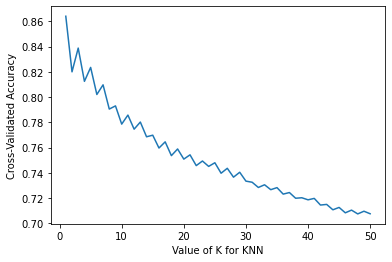

In [53]:

K = IdentifyKValueCrossValidation(X=X,Y=y,cv=5,startK=1,endK=50,scoring="accuracy")
print("Value of K with is: {}".format(K))

In [54]:
knn = KNeighborsClassifier(n_neighbors=K)
y_predicted = knn.fit(X_train,y_train).predict(X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])

Test Accuracy:  0.8519447929736512


In [55]:
pd.Series(knn.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

1.0    303
2.0    252
dtype: int64

In [56]:
### Multinomial Classifier

In [57]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [58]:
md = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [59]:
y_predicted = md.predict(X=X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])
#pd.Series(y_predicted).value_counts()

Test Accuracy:  1.0


In [60]:
pd.Series(md.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

In [61]:
### AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X_train, y_train)
scores.mean() 

1.0

In [63]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [64]:
pd.Series(clf.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

In [65]:
### As majority of the predictions for Multinomial and AdaBoost was 100% accuracy were Medium, hence we will impute accordingly

In [66]:
Sales.loc[(Sales["Outlet_Size"].isnull()),"Outlet_Size"] = 2
Sales["Outlet_Size"].value_counts()

1.0    7071
2.0    5580
3.0    1553
Name: Outlet_Size, dtype: int64

In [67]:
Sales["Outlet_Size"] = Sales["Outlet_Size"].astype(int).astype(object)
Sales["Outlet_Size"].value_counts()

1    7071
2    5580
3    1553
Name: Outlet_Size, dtype: int64

In [68]:
Sales.isnull().sum()

Item_Identifier                     0
Item_Weight                         0
Item_Fat_Content                    0
Item_Visibility                     0
Item_MRP                            0
Outlet_Establishment_Year           0
Outlet_Size                         0
Item_Outlet_Sales                5681
Type                                0
Qty_Sold                         5681
Outlet_Age                          0
Item_Type_DBBS                      0
Item_Type_Drinks                    0
Item_Type_Frozen_Canned             0
Item_Type_Fruit_Veg                 0
Item_Type_HH_HH                     0
Item_Type_Others                    0
Item_Type_Seafood_Meat              0
Outlet_Identifier_OUT013            0
Outlet_Identifier_OUT017            0
Outlet_Identifier_OUT018            0
Outlet_Identifier_OUT019            0
Outlet_Identifier_OUT027            0
Outlet_Identifier_OUT035            0
Outlet_Identifier_OUT045            0
Outlet_Identifier_OUT046            0
Outlet_Ident

In [69]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [70]:
Sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Item_Outlet_Sales', 'Type', 'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [71]:
XCols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Outlet_Size', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
YCols = 'Qty_Sold'

In [72]:
XX = Sales.loc[Sales["Type"]=="train",XCols]
yy = Sales.loc[Sales["Type"]=="train",YCols]
print(XX.shape)
print(yy.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(8523, 27)
(8523,)


In [73]:
### Linear Regression with all the columns

In [74]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (XX_train,yy_train)
print(reg.intercept_)
reg.coef_

3.571515661359184


array([ 3.62534516e-01,  1.97125177e-03, -4.75344569e-01, -2.41986204e-02,
        4.46190132e-02,  9.67378310e-02, -3.26130084e-01,  4.12913460e-02,
       -5.16302906e-02,  2.04488397e-01,  5.14234912e-02, -2.63428399e-01,
        4.12101856e-02,  5.39592959e+00,  2.47052074e+00,  6.28876741e+00,
       -4.64406211e+00,  1.15404264e+01,  1.97612887e+00,  5.60706140e-01,
        3.05114647e+00,  3.46491004e+00,  2.21588498e+00, -3.56499323e+00,
        7.29245908e+00,  6.28876741e+00,  1.15404264e+01])

In [75]:
print(len(reg.coef_))
len(XCols)

27


27

In [76]:
coef1 = pd.DataFrame(reg.coef_,XCols,columns=["Value"])
#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

In [77]:
yy_predicted = reg.predict(XX_test)
metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted)

48.69988209652185

In [78]:
r2_score(yy_test, yy_predicted)

0.41814067440785574

In [79]:
### LASSO

In [80]:
Lasso = linear_model.LassoCV(cv=5,normalize=True,random_state=10,alphas=[.0005])
Lasso
Lasso.fit(XX_train,yy_train)
print(Lasso.intercept_)
coef1 = pd.DataFrame(Lasso.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

3.0052265275853234


,Value
Outlet_Type_Supermarket Type1,13.441345
Outlet_Identifier_OUT027,12.640825
Outlet_Type_Supermarket Type3,11.181365
Outlet_Type_Supermarket Type2,10.809769
Outlet_Identifier_OUT017,0.499518
Outlet_Identifier_OUT035,0.316412
Item_Fat_Content,0.276729
Outlet_Identifier_OUT049,0.158667
Item_Type_Fruit_Veg,0.123331
Item_MRP,0.001319


In [81]:
yy_predicted = Lasso.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.656871372516605
0.41865456047462923


In [82]:
Lasso.fit(XX,yy)

LassoCV(alphas=[0.0005], cv=5, normalize=True, random_state=10)

In [83]:
## Adaptive Boost

In [84]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)

In [85]:
regressor.fit(XX_train, yy_train)

AdaBoostRegressor(learning_rate=0.005, n_estimators=100)

In [86]:
yy_predicted = regressor.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.6654470210263
0.41855209983522823


In [87]:
regressor.fit(XX,yy)

AdaBoostRegressor(learning_rate=0.005, n_estimators=100)

In [88]:
### Ridge

In [89]:
Ridge = linear_model.Ridge(random_state=10,normalize=True,alpha=.001)
Ridge

Ridge(alpha=0.001, normalize=True, random_state=10)

In [90]:
Ridge.fit(XX_train,yy_train)
#print(Ridge.intercept_)
coef1 = pd.DataFrame(Ridge.coef_,XCols,columns=["Value"])
#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

In [91]:
yy_predicted = Ridge.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.69851612158346
0.41815699488384483


In [92]:
Ridge.fit(XX,yy)

Ridge(alpha=0.001, normalize=True, random_state=10)

In [93]:
### Decision tree for Regression

In [94]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_depth=3)
Dtree.fit(XX_train,yy_train)

DecisionTreeRegressor(max_depth=3)

In [95]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.865410192892234
0.4161629680485317


In [96]:
Dtree.fit(XX,yy)

DecisionTreeRegressor(max_depth=3)

In [97]:
from sklearn.ensemble import RandomForestRegressor
RForrest = RandomForestRegressor()
RForrest.fit(XX_train,yy_train)

RandomForestRegressor()

In [98]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.44411027965153
0.42119660001717596


In [99]:
Dtree.fit(XX,yy)

DecisionTreeRegressor(max_depth=3)

In [100]:
## Testing the MODEL 

In [101]:
Sales_Predict = Sales.loc[Sales["Type"]=="test",XCols]
Sales_Predict.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Size,Outlet_Age,Item_Type_DBBS,Item_Type_Drinks,Item_Type_Frozen_Canned,Item_Type_Fruit_Veg,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,0,107.8622,0.007565,20.750,2,22,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8524,1,87.3198,0.038428,8.300,1,14,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8525,0,241.7538,0.099575,14.600,2,23,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8526,0,155.0340,0.015388,7.315,1,14,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8527,1,234.2300,0.118599,13.600,2,36,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [102]:
##### Combining LASSO, ADB and Ridge together

In [103]:
Lasso_Prediction = Lasso.predict(Sales_Predict)
ADB_Prediction = regressor.predict(Sales_Predict)
Ridge_Prediction = Ridge.predict(Sales_Predict)
RForrest_Prediction = RForrest.predict(Sales_Predict)
Dtree_Prediction = Dtree.predict(Sales_Predict)

In [104]:
print(Lasso_Prediction[:5])
print(ADB_Prediction[:5])
print(Ridge_Prediction[:5])
print(RForrest_Prediction[:5])
print(Dtree_Prediction[:5])

[16.38839972 16.53388655  3.02660887 16.50001025 26.61073934]
[16.19228727 16.62740409  2.41441605 16.63544957 26.59126962]
[16.36215476 16.58448813  2.56700997 16.6545641  26.76259173]
[17.77504321 15.13441667  2.27147656 13.02067095 27.01097635]
[16.49094575 16.49094575  2.41317621 16.49094575 26.50672595]


In [105]:
#Data_Predicted

In [106]:
Data_Predicted["Lasso_Prediction"] = pd.Series(Lasso_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["ADB_Prediction"] = pd.Series(ADB_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["Ridge_Prediction"] = pd.Series(Ridge_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["DTree_Prediction"] = pd.Series(Dtree_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["RForrest_Prediction"] = pd.Series(RForrest_Prediction) * Data_Predicted["Item_MRP"]

In [107]:
Data_Predicted["Item_Outlet_Sales"] = (Data_Predicted["Lasso_Prediction"]+Data_Predicted["ADB_Prediction"]+Data_Predicted["ADB_Prediction"]+Data_Predicted["DTree_Prediction"]+Data_Predicted["RForrest_Prediction"])/5

In [108]:
Data_Predicted.drop(["Item_MRP","Lasso_Prediction","ADB_Prediction","Ridge_Prediction","RForrest_Prediction","DTree_Prediction"],axis=1,inplace=True)
Data_Predicted.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1791.353052
1,FDW14,OUT017,1421.811838
2,NCN55,OUT010,606.323063
3,FDQ58,OUT017,2458.297430
4,FDY38,OUT027,6245.086211


In [109]:
Data_Predicted.to_csv('Documents/SalesPrediction_submission.csv', index=False)